In [1]:
import pandas as pd
import matplotlib

In [2]:
train = pd.read_csv('http://data.cityofnewyork.us/resource/qiz3-axqb.csv')
train.head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,...,off_street_name,on_street_name,time,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,46.0,24669.0,41.0,71.0,3.0,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,...,NaN,NORTH CONDUIT AVENUE,15:06,4075995,Sedan,Refrigerated Van,NaN,NaN,NaN,NaN
1,10.0,12074.0,12.0,6.0,4.0,MANHATTAN,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,...,NaN,NaN,0:00,4076372,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,10011.0
2,20.0,14193.0,22.0,67.0,3.0,NaN,Following Too Closely,Unspecified,NaN,NaN,...,NaN,46 AVENUE,12:00,4075229,Station Wagon/Sport Utility Vehicle,Van,NaN,NaN,NaN,NaN
3,39.0,13090.0,47.0,21.0,4.0,MANHATTAN,Driver Inattention/Distraction,Unspecified,NaN,NaN,...,NaN,NaN,11:06,4075858,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,10032.0
4,NaN,NaN,NaN,NaN,NaN,MANHATTAN,Failure to Keep Right,Other Vehicular,NaN,NaN,...,8 AVENUE,W 56 STREET,10:36,4075131,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,10019.0


In [3]:
train.columns.to_list()

[':@computed_region_92fq_4b7q',
 ':@computed_region_efsh_h5xi',
 ':@computed_region_f5dn_yrer',
 ':@computed_region_sbqj_enih',
 ':@computed_region_yeji_bk3q',
 'borough',
 'contributing_factor_vehicle_1',
 'contributing_factor_vehicle_2',
 'contributing_factor_vehicle_3',
 'contributing_factor_vehicle_4',
 'contributing_factor_vehicle_5',
 'cross_street_name',
 'date',
 'latitude',
 'location',
 'location_address',
 'location_city',
 'location_state',
 'location_zip',
 'longitude',
 'number_of_cyclist_injured',
 'number_of_cyclist_killed',
 'number_of_motorist_injured',
 'number_of_motorist_killed',
 'number_of_pedestrians_injured',
 'number_of_pedestrians_killed',
 'number_of_persons_injured',
 'number_of_persons_killed',
 'off_street_name',
 'on_street_name',
 'time',
 'unique_key',
 'vehicle_type_code1',
 'vehicle_type_code2',
 'vehicle_type_code_3',
 'vehicle_type_code_4',
 'vehicle_type_code_5',
 'zip_code']

In [4]:
# train.DATE.value_counts().head().plot.bar()
train.date.value_counts().head().plot.line()

In [5]:
type(train.date)
train.date = pd.to_datetime(train.date, infer_datetime_format=True)
type(train.date)

pandas.core.series.Series

In [6]:
from pandas import Grouper
train.groupby(Grouper(key='date', freq='M')).sum().head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,latitude,location_address,location_city,location_state,location_zip,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code
date,,,,,,,,,,,,,,,,,,,,,
2019-02-28,24295.0,13540980.0,33458.0,40201.0,2895.0,37266.174209,0.0,0.0,0.0,0.0,...,14,0,196,0,55,1,265,1,4075361127,6734382.0


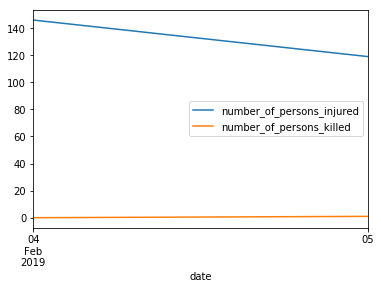

In [7]:
train.groupby(Grouper(key='date', freq='D')).sum().plot.line(y=['number_of_persons_injured', 
                                                                'number_of_persons_killed'],
                                                            secondary_y=1)

In [8]:
train['unique_key'].describe()
train['unique_key'].isnull().any()

False

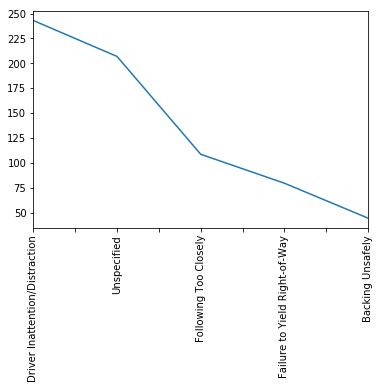

In [9]:
train['contributing_factor_vehicle_1'].value_counts().head().plot.line(rot=90)

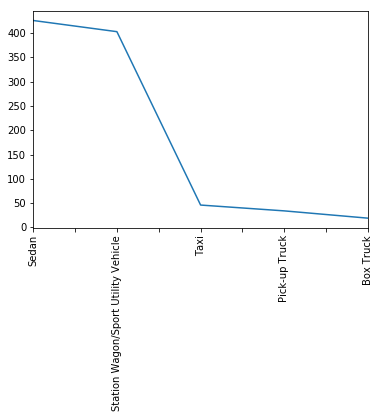

In [10]:
train['vehicle_type_code1'].value_counts().head().plot.line(rot=90)

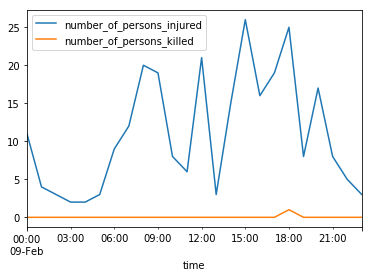

In [11]:
train.time = pd.to_datetime(train.time, infer_datetime_format=True)

train.groupby(Grouper(key='time', freq='H')).sum().plot.line(y=['number_of_persons_injured', 
                                                                'number_of_persons_killed'],
                                                            secondary_y=1)

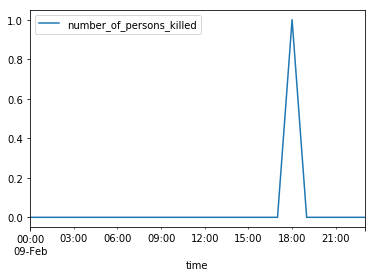

In [12]:
train.groupby(Grouper(key='time', freq='H')).sum().plot.line(y='number_of_persons_killed',
                                                            )

In [13]:
train.groupby('borough').sum()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,latitude,location_address,location_city,location_state,location_zip,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,3045.0,1206147.0,4154.0,3088.0,534.0,4371.183682,0.0,0.0,0.0,0.0,...,0,0,27,0,5,0,32,0,452360300,1161304.0
BROOKLYN,4887.0,2816982.0,5483.0,7918.0,352.0,7155.487467,0.0,0.0,0.0,0.0,...,4,0,40,0,13,0,57,0,737663576,2030615.0
MANHATTAN,3573.0,1420769.0,4088.0,1071.0,468.0,4769.092912,0.0,0.0,0.0,0.0,...,3,0,8,0,9,0,20,0,497211072,1222855.0
QUEENS,4733.0,3366510.0,8448.0,11911.0,546.0,7410.008227,0.0,0.0,0.0,0.0,...,1,0,34,0,19,1,54,1,749838525,2092871.0
STATEN ISLAND,271.0,234937.0,388.0,1659.0,22.0,892.933741,0.0,0.0,0.0,0.0,...,0,0,10,0,1,0,11,0,89661428,226737.0


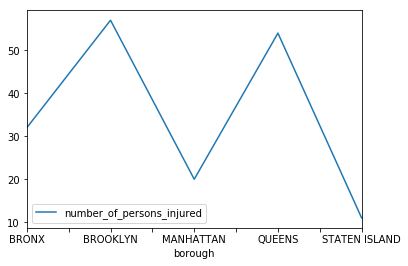

In [14]:
train.groupby('borough').sum().plot.line(y='number_of_persons_injured')

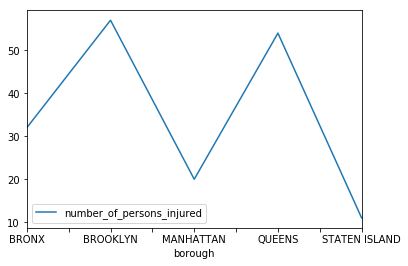

In [15]:
train.groupby('borough').sum().plot.line(y='number_of_persons_injured')

In [16]:
import folium
from folium.plugins import MarkerCluster

In [17]:
train.head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,...,off_street_name,on_street_name,time,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,46.0,24669.0,41.0,71.0,3.0,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,...,NaN,NORTH CONDUIT AVENUE,2019-02-09 15:06:00,4075995,Sedan,Refrigerated Van,NaN,NaN,NaN,NaN
1,10.0,12074.0,12.0,6.0,4.0,MANHATTAN,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,...,NaN,NaN,2019-02-09 00:00:00,4076372,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,10011.0
2,20.0,14193.0,22.0,67.0,3.0,NaN,Following Too Closely,Unspecified,NaN,NaN,...,NaN,46 AVENUE,2019-02-09 12:00:00,4075229,Station Wagon/Sport Utility Vehicle,Van,NaN,NaN,NaN,NaN
3,39.0,13090.0,47.0,21.0,4.0,MANHATTAN,Driver Inattention/Distraction,Unspecified,NaN,NaN,...,NaN,NaN,2019-02-09 11:06:00,4075858,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,10032.0
4,NaN,NaN,NaN,NaN,NaN,MANHATTAN,Failure to Keep Right,Other Vehicular,NaN,NaN,...,8 AVENUE,W 56 STREET,2019-02-09 10:36:00,4075131,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,10019.0


In [18]:
# Folium location values cannot contain nans
train.dropna(inplace=True
            , subset=['latitude', 'longitude'])

In [20]:
m=folium.Map(location=[train.latitude.mean(), train.longitude.mean()]
            , tiles='Stamen Toner')
mc = MarkerCluster()
for name, row in train.iterrows():
    folium.CircleMarker(location=[row.latitude, row.longitude]
                        , radius=row['number_of_persons_injured']
                        , popup=str(row['number_of_persons_injured'])
                 ).add_to(mc)
m.add_child(mc)
m